#  Exploratory Analysis on which cities has the most volatile markets
### Paul Samaniego

In [1]:
import pandas as pd
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import project1scripts

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\Saman\Coolest-project-1


In [3]:
filename = "clean_median_sale_price_v2_df.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,38066700,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,47166700,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,21233300,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,18112500,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,17865000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [4]:
#Author: anderoos
df['StateName'] = df['StateName'].astype('str')
# Define categories
northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
southwest = ['TX', 'OK', 'AR']
# Filters state codes into separate dataframes

def USRegion(value):
    if value in northeast:
        return "northeast"
    elif value in southeast:
        return "southeast"
    elif value in midwest:
        return "midwest"
    elif value in west:
        return "west"
    elif value in southwest:
        return "southwest"



df.insert(loc=0, column = "US Region", value = df["StateName"].apply(USRegion))

df.head()
    

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,northeast,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,west,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,midwest,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,southwest,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,southwest,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [5]:
df_regions_west = df[df["US Region"] == "west"]
df_regions_west.head()

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
1,west,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
10,west,"Phoenix, AZ",AZ,16266700.0,16366700.0,16766700.0,17430000,17996700,18493300,18833500,...,45248300,44296700,43163300,42233300,41966700,42466700,42866700,43466700,44300000,44666700
11,west,"San Francisco, CA",CA,40583300.0,39850000.0,41166700.0,46500000,51666700,55500000,56500000,...,105433300,106266700,102266700,96333300,91983300,95316700,101316700,107333300,111000000,111666700
12,west,"Riverside, CA",CA,21233300.0,21400000.0,21833300.0,22600000,23400000,23966700,24466700,...,53333300,52000000,51250000,50416700,50916700,51166700,52166700,52850000,53350000,53516700
14,west,"Seattle, WA",WA,26771300.0,26688000.0,27248300.0,28915000,30381700,31250000,32250000,...,66333300,65166700,63666700,61833300,61233300,61966700,63633300,66233300,68300000,69466700


In [6]:
#calculating the rolling 12 month average, for the the first 11 months just doing the minimum
west_cities_df = df_regions_west.drop(columns=["US Region", "StateName"]).set_index("RegionName")
moving_avg_west_df = west_cities_df.rolling(window=12, axis=1, min_periods=1).mean()
#moving_avg_midwest_df.to_csv("testing.csv")
moving_avg_west_df.head()


C:\Users\Saman\AppData\Local\Temp\ipykernel_15344\3251225742.py:3: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  moving_avg_west_df = west_cities_df.rolling(window=12, axis=1, min_periods=1).mean()


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Los Angeles, CA",39400000.0,39566650.0,3.995553e+07,40733325.0,41600000.0,4.241667e+07,4.304761e+07,43562500.0,4.392963e+07,44190000.0,...,8.666735e+07,8.680277e+07,8.677221e+07,8.665554e+07,8.644166e+07,8.616943e+07,8.573054e+07,8.524443e+07,8.490554e+07,8.483054e+07
"Phoenix, AZ",16266700.0,16316700.0,1.646670e+07,16707525.0,16965360.0,1.722002e+07,1.745051e+07,17623387.5,1.775081e+07,17849060.0,...,4.590203e+07,4.604009e+07,4.604481e+07,4.593481e+07,4.573037e+07,4.546759e+07,4.513148e+07,4.473704e+07,4.435162e+07,4.401553e+07
"San Francisco, CA",40583300.0,40216650.0,4.053333e+07,42025000.0,43953340.0,4.587778e+07,4.739524e+07,48450000.0,4.908519e+07,49490000.0,...,1.098014e+08,1.098097e+08,1.096792e+08,1.093319e+08,1.086153e+08,1.077458e+08,1.066125e+08,1.054597e+08,1.044319e+08,1.038597e+08
"Riverside, CA",21233300.0,21316650.0,2.148887e+07,21766650.0,22093320.0,2.240555e+07,2.270000e+07,22945837.5,2.315556e+07,23326670.0,...,5.377083e+07,5.389583e+07,5.388889e+07,5.375695e+07,5.361112e+07,5.341668e+07,5.319446e+07,5.293196e+07,5.266946e+07,5.248335e+07
"Seattle, WA",26771300.0,26729650.0,2.690253e+07,27405650.0,28000860.0,2.854238e+07,2.907204e+07,29466162.5,2.976581e+07,29938860.0,...,6.712986e+07,6.731042e+07,6.736598e+07,6.737986e+07,6.728819e+07,6.702917e+07,6.650625e+07,6.592222e+07,6.547499e+07,6.529166e+07


In [7]:
number_of_periods = len(moving_avg_west_df.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((moving_avg_west_df["7/31/2023"] / 
                           moving_avg_west_df["1/31/2013"])**(12/number_of_periods)-1)
})

top_3_cities = growth_rate_by_state["Growth Rate"].nlargest(3).index
bottom_3_cities = growth_rate_by_state["Growth Rate"].nsmallest(3).index

cities_to_plot = [item for sublist in [top_3_cities, bottom_3_cities] for item in sublist]

top_bottom_cities = pd.DataFrame({"RegionName":cities_to_plot}).set_index("RegionName")
cities_to_plot
#growth_rate_by_state.head()
#top_bottom_cities.head()

['Fernley, NV',
 'Boise City, ID',
 'St. George, UT',
 'Clovis, NM',
 'Farmington, NM',
 'Casper, WY']

In [8]:
top_bottom_cities_combined = growth_rate_by_state.merge(moving_avg_west_df[["1/31/2013", "7/31/2023"]], on="RegionName", how="left")
df_to_plot = top_bottom_cities_combined[top_bottom_cities_combined.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
df_to_plot

,Growth Rate,1/31/2013,7/31/2023
RegionName,,,
"Boise City, ID",0.117039,140633.0,453743.000000
"St. George, UT",0.113734,163283.0,510558.250000
"Farmington, NM",0.042482,161067.0,250169.416667
"Casper, WY",0.042958,177550.0,277104.250000
"Fernley, NV",0.127404,107917.0,383943.083333
"Clovis, NM",0.026462,157575.0,207746.416667


In [9]:
#bars = plt.bar(df_to_plot.index, df_to_plot["7/31/2023"])

#for i, bar in enumerate(bars):
#    growth_rate = df_to_plot['Growth Rate'].iloc[i]
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'{growth_rate:.2%}', ha="center")

#plt.xlabel("City")
#plt.ylabel("Sales in Thousands")

#plt.title("Top 3 / Bottom 3 Midwest Cities")

#plt.grid(True)
#plt.xticks(rotation=45, ha="right")

#plt.tight_layout()
#plt.show()

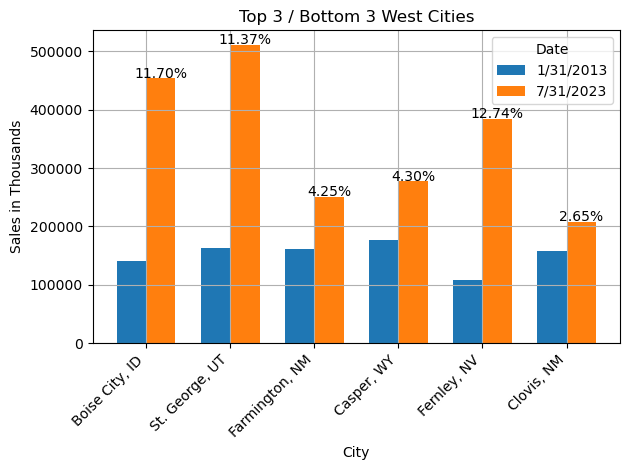

In [13]:
# Extract data
cities = df_to_plot.index
values_1_31_2013 = df_to_plot["1/31/2013"]
values_7_31_2023 = df_to_plot["7/31/2023"]

# Define the width of each bar group
bar_width = 0.35

# Create an array of indices for x-axis positions
x_indices = np.arange(len(cities))

# Create two sets of bars for each city
plt.bar(x_indices - bar_width/2, values_1_31_2013, width=bar_width, label='1/31/2013')
plt.bar(x_indices + bar_width/2, values_7_31_2023, width=bar_width, label='7/31/2023')

# Add labels to the x-axis ticks
plt.xticks(x_indices, cities, rotation=45, ha="right")

# Display the Growth Rate values above each bar
for i, value_7_31_2023 in enumerate(values_7_31_2023):
    growth_rate = df_to_plot['Growth Rate'].iloc[i]
    plt.text(x_indices[i] + bar_width/2, value_7_31_2023 + 1500, f'{growth_rate:.2%}', ha="center")

plt.xlabel("City")
plt.ylabel("Sales in Thousands")
plt.title("Top 3 / Bottom 3 West Cities")

plt.grid(True)
plt.legend(title="Date")
plt.tight_layout()
plt.savefig("Images/Moving Averages/Cities_by_Region/Growth_West_Cities_bar.png")
plt.show()

In [11]:
top_bottom_cities_combined_line = top_bottom_cities.merge(moving_avg_west_df, on="RegionName", how="left")
#df_to_plot_line = top_bottom_cities_combined_line[top_bottom_cities_combined_line.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
#df_to_plot_line
top_bottom_cities_combined_line

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Fernley, NV",107917.0,108117.0,108961.333333,110050.25,111373.6,112755.833333,114933.571429,116939.750,118166.777778,119315.1,...,389183.416667,391147.333333,392401.500000,393333.416667,393040.333333,392357.000000,391159.750000,388232.000000,386202.833333,383943.083333
"Boise City, ID",140633.0,139858.0,140383.000000,141837.25,143919.8,146586.000000,149002.285714,151114.500,152461.000000,153471.6,...,485301.333333,483774.916667,481384.666667,477988.833333,474037.416667,469468.000000,464793.000000,459756.916667,455888.833333,453743.000000
"St. George, UT",163283.0,164533.0,168288.666667,170258.25,172540.0,175388.833333,177852.285714,179870.750,181629.555556,183656.6,...,529826.500000,533493.166667,535937.583333,535909.833333,532805.583333,527694.416667,523305.500000,519283.333333,515893.000000,510558.250000
"Clovis, NM",157575.0,148900.0,143983.333333,143233.25,144086.6,143736.000000,145271.285714,147006.125,148005.444444,147903.2,...,202407.500000,202678.333333,203477.000000,202636.750000,202463.083333,202557.500000,204749.166667,206302.000000,207336.666667,207746.416667
"Farmington, NM",161067.0,163233.5,162244.666667,161566.75,160226.8,161577.833333,163066.714286,165162.500,166403.666667,167395.0,...,238023.750000,241272.333333,245005.666667,247169.500000,248836.166667,248780.583333,249586.083333,250044.416667,250002.750000,250169.416667
"Casper, WY",177550.0,178341.5,177994.333333,178329.00,178596.6,180147.166667,181683.285714,183137.500,183511.111111,183476.7,...,258465.333333,259984.833333,261602.833333,263991.750000,267655.666667,271540.333333,274077.833333,275507.000000,276465.333333,277104.250000


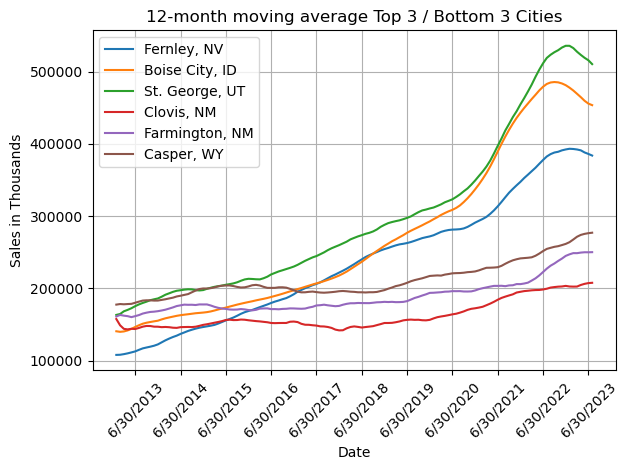

In [14]:
df_transposed = top_bottom_cities_combined_line.transpose()

custom_x_ticks = ["6/30/2013", "6/30/2014", "6/30/2015","6/30/2016", "6/30/2017","6/30/2018",
                  "6/30/2019", "6/30/2020", "6/30/2021", "6/30/2022", "6/30/2023"]

for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("12-month moving average Top 3 / Bottom 3 Cities")
plt.xlabel("Date")
plt.ylabel("Sales in Thousands")
plt.legend()
plt.grid(True)
plt.xticks(custom_x_ticks, rotation=45)
plt.tight_layout()
plt.savefig("Images/Moving Averages/Cities_by_Region/12MMA_West_Cities_line.png")
plt.show()